In [1]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt


# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

In [2]:

URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'

power_plants = pd.read_csv(URL)

# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

power_plants.head(3)

,unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,0.0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


In [3]:
power_plants.head()

,unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,0.0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900
3,3.0,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889
4,4.0,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900


The power plants file is a CSV. Unlike shapefiles or other geospatial file formats, geopandas doesn’t have a way to extract a geometry column from a CSV file, so we will need to create this geometry manually.

To do so we will use the longitude and latitude columns in the CSV, these indicate the location of the power plants in the NAD83 CRS (EPSG:4269). We can use this information to create a new geopandas.GeoDataFrame from the pandas.DataFrame using the geopandas function points_from_xy():

In [4]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )

print(power_plants.columns)

print(power_plants.head())

Index(['unnamed: 0', 'objectid', 'plant_code', 'plant_name', 'utility_id',
       'utility_name', 'sector_name', 'street_address', 'city', 'county',
       'state', 'zip', 'primsource', 'source_desc', 'tech_desc', 'install_mw',
       'total_mw', 'bat_mw', 'bio_mw', 'coal_mw', 'geo_mw', 'hydro_mw',
       'hydrops_mw', 'ng_mw', 'nuclear_mw', 'crude_mw', 'solar_mw', 'wind_mw',
       'other_mw', 'source', 'period', 'longitude', 'latitude', 'geometry'],
      dtype='object')
   unnamed: 0 objectid plant_code          plant_name utility_id  \
0         0.0    11570          1          Sand Point      63560   
1         1.0    11571          2        Bankhead Dam        195   
2         2.0    11572          3               Barry        195   
3         3.0    11573          4  Walter Bouldin Dam        195   
4         4.0    11574          9              Copper       5701   

                     utility_name       sector_name        street_address  \
0  TDX Sand Point Generating, LLC  E

In [5]:
print(power_plants.crs.is_geographic)

True


<Axes: >

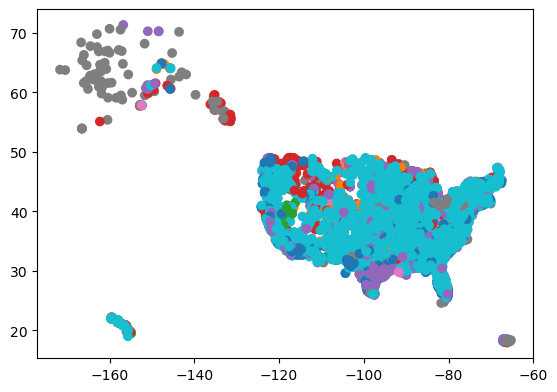

In [6]:
power_plants.plot(column = 'primsource')

In [7]:
fp = os.path.join('data')

f-strings
So far, we have printed variables using string concatenation inside the print() function. This means that we write commas between every string and variable we want to print, and then the print() function concatenates these into a single string. For example:

In [8]:
print('CRS: ', power_plants.crs)

CRS:  EPSG:4269


Another popular way of mixing strings and variables in print statements is by creating an f-string which stands for “formatted string”. The simplest syntax for an f-string is:

```pyhton
f" some text {replace}"
```

In [9]:
# check what is the ellipsoid
print(f"ellipsoid: {power_plants.crs.ellipsoid}")
print(f"datum: {power_plants.crs.datum}")

ellipsoid: GRS 1980
datum: North American Datum 1983


In [10]:
# Set the label width to 25 characters, aligning the answers
# f string allows for customization aligning the answers 
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?:':<25} {power_plants.crs.is_projected}")

Is the CRS geographic?:   True
Is the CRS projected?:    False


In [11]:
## Imort shapefile TIGER

In [12]:
os.getcwd()

'/Users/jmull/MEDS/eds220/eds220-2024-in-class'

In [13]:
# create new file path to get data with absolute file path
fp = os.path.join('/',
                 'courses',
                 'EDS220',
                 'data',
                 'tl_2022_us_state',
                 'tl_2022_us_state.shp')

In [14]:
# Simplify column names 
states = gpd.read_file(fp)
states.columns = states.columns.str.lower()
states.head()
states.columns

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


Index(['region', 'division', 'statefp', 'statens', 'geoid', 'stusps', 'name',
       'lsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat', 'intptlon',
       'geometry'],
      dtype='object')

'for' loops

It can be easier to work with the codes as numbers instead of strings, so let’s update the corresponding columns in the states geo-dataframe.

We start by checking the data type of the region, division, and statefp columns:


In [15]:
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


In [16]:
# We could have checked whether all the region, division, and statefp columns were of string data type by
# using the following code:

print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])}")

# However, this is inconvenient as it repeats the same pieces of code, only changing the column name. 
# Instead, using the for loop allows us to succintly print the same information:

code_cols = ['region', 'division', 'statefp']

for column in code_cols: 
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

# Don’t Repeat Yourself (DRY) is a core programming principle that encourages reducing redundancy and consolidating repeated logic. Try implementing it as much as possible! If you need to repeat the “same” code more than twice, you likely need a for loop.

region is string dtype? True
division is string dtype? True
statefp is string dtype? True
region is string dtype? True
division is string dtype? True
statefp is string dtype? True


Next, we update the data type of the code columns to be integers. This time, we check the data type of the column using the is_numeric_dtype() function inside an assert statement:

In [17]:
# Update code columns into integers 
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column]) # check conversion 

The `assert` keyword does nothing if the expression evals to true. If the expression evaluates to false the assert raises assertionerror and stops your code from running. 
Example: 

In [18]:
# does nothing if statement is true 
assert 2 + 2 == 4

In [19]:
# raises an error if statement is false 
#assert 2 + 2 == 3

## Data Selction 

for this lesson we want to use only the contiguous states. The 'states' geodatabase covers a bigger expansion

<Axes: >

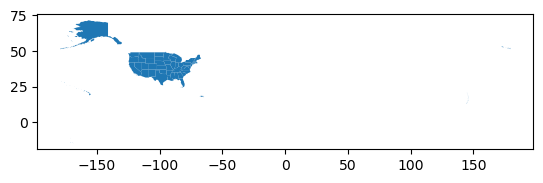

In [20]:
states.plot()

## check-in 

- what are the unique values for the region, division, or state codes 
- Which codes should should we select to keep only states in the contiguous US?

In [21]:
states['region'].unique()

array([3, 2, 1, 4, 9])

In [22]:
states['division'].unique()

array([5, 3, 4, 1, 8, 9, 2, 7, 6, 0])

In [23]:
states['statefp'].unique()

array([54, 12, 17, 27, 24, 44, 16, 33, 37, 50,  9, 10, 35,  6, 34, 55, 41,
       31, 42, 53, 22, 13,  1, 49, 39, 48,  8, 45, 40, 47, 56, 15, 38, 21,
       78, 69, 66, 23, 36, 32,  2, 60, 26,  5, 28, 29, 30, 20, 18, 72, 46,
       25, 51, 11, 19,  4])

Hawaii and Alaska have codes 2, 15 and then region 9 should also be excluded

In [24]:
# Select contiguous US state

contiguous = states[ (states.region!=9) & (~states.statefp.isin([2, 15]))]

In [25]:
states.statefp.isin([2, 15])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31     True
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
Name: statefp, dtype: bool

<Axes: >

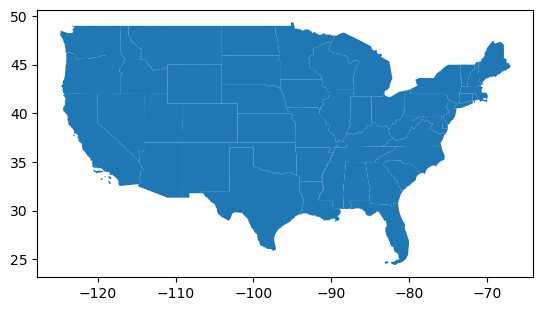

In [26]:
contiguous.plot()

In [27]:
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

In [28]:
# before plotting check crs
contiguous.crs == power_plants.crs

True

<function matplotlib.pyplot.show(close=None, block=None)>

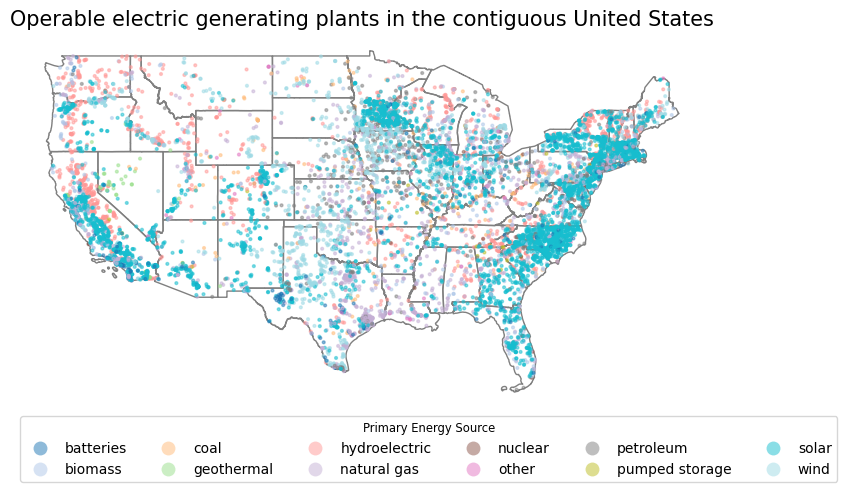

In [29]:
fig, ax = plt.subplots(figsize= (9,5))

# remove axis for cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Operable electric generating plants in the contiguous United States', 
              fontsize=15)

contiguous.plot(ax = ax,
               color = 'none',
               edgecolor = 'gray')

power_plants.plot(ax = ax, 
                 column = 'primsource',
                 legend = True,
                 markersize = 4, 
                 cmap = 'tab20', 
                 alpha = .5, 
                 legend_kwds = {
                     'title': 'Primary Energy Source',
                     'title_fontsize' : 'small',
                     'ncol':6, 
                     'loc' : 'upper left',
                     'bbox_to_anchor': (0,0)
                 })

plt.show

In the map above we specified the figure size when creating the plot. This size is given in inches, but can be updated to other units (pixels, cm, etc).

We also controlled the legend location using loc and bbox_to_anchor in the legend_kwds:

loc indicates the corner of the legend we want to use for placement, and
bbox_to_anchor is a tuple with coordinates indicating where to place the corner specified in loc relative to the axes. Values between 0 and 1 are within the axes.

## `for` with `zip`

often, we need to iterate simultanously over two lists (or iterables).

`zip` is a pyhton function that allows you to combine two lists so that you can iterate over their elements in pairs 

example: 

In [30]:
# Iterate over a single list 
numbers = [1,2,3]
for num in numbers:
    print(num)

1
2
3


In [31]:
# Iterate over two lists in pairs using zip()

letters = ['a','b','c']
for num, letter in zip(numbers, letters):
    print(num, letter)

1 a
2 b
3 c


Example: with `matplotlib`
A common situation when code gets repeated is when creating subplots 

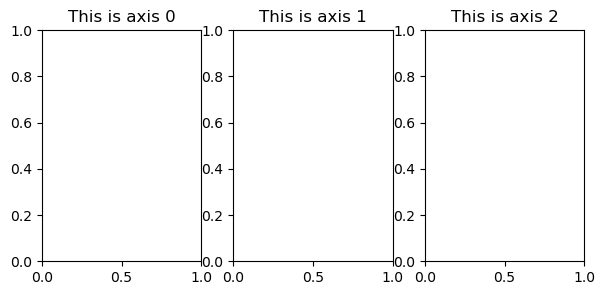

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()

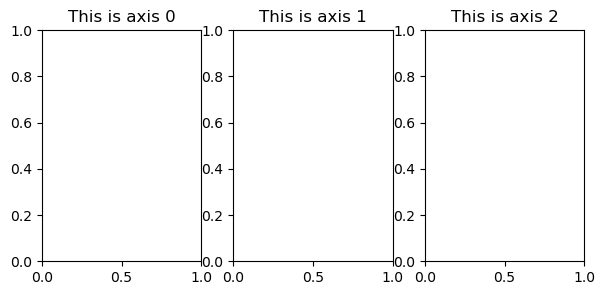

In [34]:
# Use for and zip() to create the same subplots and avoid redundancy.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 3))
titles = ['This is axis 0', 'This is axis 1', 'This is axis 2']

for ax, title in zip(axes, titles):
    ax.set_title(title)

plt.show()



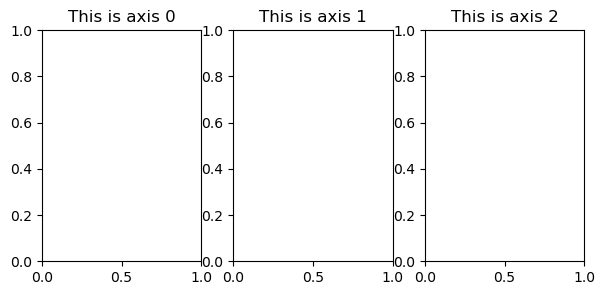

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 3))

for ax, i in zip(axes, [0,1,2]):
    ax.set_title(f"This is axis {i}")
    
plt.show()

In [49]:
power_plants.columns

ca_power_plants = power_plants[power_plants.state == 'California']

ca_power_plants.head



<bound method NDFrame.head of        unnamed: 0 objectid plant_code                       plant_name  \
19           19.0    11589         34                          Rollins   
38           38.0    11608         72                     Venice Hydro   
54           54.0    11624        104                     J S Eastwood   
74           74.0    11644        151                          McClure   
80           80.0    11650        161                     Turlock Lake   
...           ...      ...        ...                              ...   
11931     11930.0    23500      66472  San Manuel Central Plant Cogens   
11942     11941.0    23511      66492                  Henry Miller RD   
11944     11943.0    23513      66500                 Valley Center 85   
11946     11945.0    23515      66502                 Valley Center 54   
11992     11991.0    23561      66622            9150 Hermosa Solar GM   

      utility_id                         utility_name         sector_name  \
19  

In [54]:
top_sources = ca_power_plants.primsource.value_counts().head(3).index.to_list()

top_sources

['solar', 'natural gas', 'hydroelectric']

In [58]:
ca_boundary = states[states.name == 'California']

<function matplotlib.pyplot.show(close=None, block=None)>

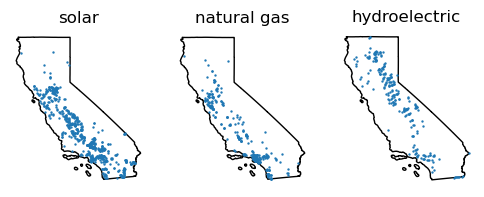

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 3))

top_sources = ca_power_plants.primsource.value_counts().head(3).index.to_list()

ca_boundary = states[states.name == 'California']

ca_power_plants = power_plants[power_plants.state == 'California']

for ax, source in zip(axes, top_sources):
    ca_boundary.plot(ax=ax,
                    color='none')
    subset = ca_power_plants[ca_power_plants.primsource == source]
    subset.plot(ax=ax,
               markersize = .5)
    ax.set_title(source)
    ax.axis('off')
    
plt.show

## Functions
Next, we want to keep exploring these maps of the top 3 electric primary sources for different states. This is a scenario where creating functions can be useful. In Python, functions are blocks of reusable code designed to perform specific tasks, helping to make your code more modular and organized. The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```


Let’s see two simple examples just to get familiar with the syntax. In the first one we have a simple function with a one-line docstring, no parameters, and no return values.

In [63]:
def greet():
   """Print a greeting message."""
   print("Hello, welcome to the class!")

In [64]:
greet()

Hello, welcome to the class!


The second one has a single parameter and a more detailed docstring with information abou the arguments and return values.

In [65]:
def calculate_area(radius):
   """
   Calculate the area of a circle given its radius.
   
   Args:
       radius (float): The radius of the circle.
       
   Returns:
       float: The area of the circle, calculated as π * radius^2.
   """
   area = 3.14159 * radius ** 2
   return area

In [66]:
calculate_area(2)

12.56636

Example
Going back to our power plants data frame, let’s create a function that will give us the top 3 primary energy sources for a given state:

In [70]:
def top3_sources(state):
    """
    Find the top 3 electric primary sources of given state.
    
    Args:
        state (str): The US state we want information about.
        power_plants (pd.DataFrame): DataFrame containing data 
        on power plants, with at least 'state' and 'primsource' columns.
    Returns:
        list: A list of the top 3 primary sources of the state within the power_plants data frame.
    """
    state_power_plants = power_plants[power_plants['state']==state]
    top_sources = (state_power_plants['primsource']
                                .value_counts()
                                .index[:3]
                                .tolist()
                                )
    return top_sources

In [78]:
top3_sources('Alaska')

[]